## Pytorch Workflow

* data preparing and loading
* build model
* fitting the mdoel to data(training)
* maing prediction and evaluating model(inference)
* saving and loading the model
* combining everything together

In [68]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

## Data(preparing and loading)

In [69]:
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w*X+b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [70]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [71]:
len(X), len(y)

(50, 50)

### Splitting data into training and testing dataset

In [72]:
train_split_size = int(0.8*len(X))
train_split_size

40

In [73]:
X_train, y_train = X[:train_split_size], y[:train_split_size]
X_test, y_test = X[train_split_size:], y[train_split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Building function to visualize the data

In [74]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [75]:
def plot_pred(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              predictions=None):
  """
  plots training data, testdata and compares predictions.
  """

  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_label, c="b",s=4,label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_label, c="g",s=4,label="Test data")

  #Are there predictions?
  if predictions is not None:
    #plot predictions if exist
    plt.scatter(test_data, predictions, c="r",s=4,label="Predictions")

  #show legend
  plt.legend()


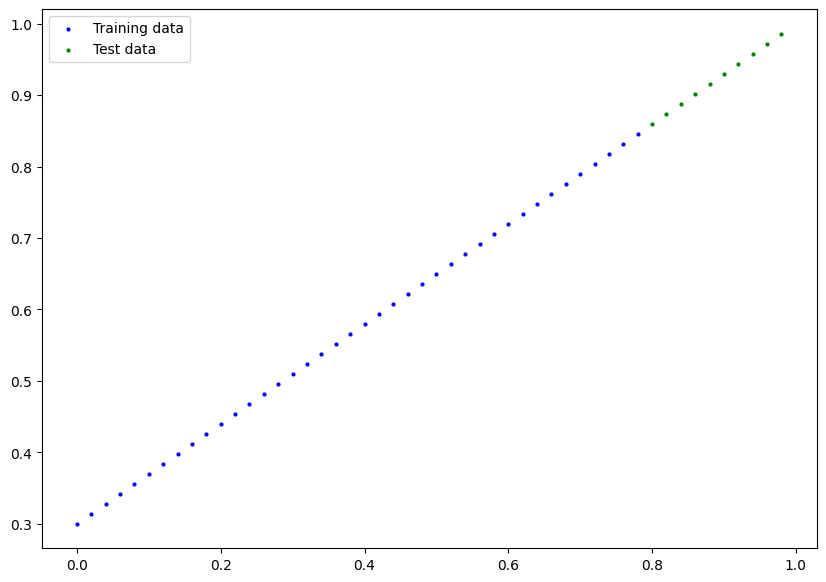

In [76]:
plot_pred()

## Building Linear Regression Model

In [77]:
class LinearRegressionModel(nn.Module):
  #almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    #initialising model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float))
    # forward() method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # x => input data
    return self.weights*x + self.bias


## Pytorch model builing essentials

* `torch.nn` - contains all neural network essestials
* `torch.nn.Parameter` - parameters model should learn
* `torch.nn.Module` - base class for all neural network modules
* `torch.optim` - optimizers
* `def forward()` - **compulsory** all nn.Module subclasses require you to overwirte forward(), this method defines what happens in the forward computation

### checking contents of our pytorch model

In [78]:
#create a random seed
torch.manual_seed(42)

#create an instance of the model
model0 = LinearRegressionModel()
model0

LinearRegressionModel()

In [79]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
# List named parameters => better way to do it
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [81]:
w,b

(0.7, 0.3)

### making prediction using `torch.inference_mode()`

In [82]:
#make prediction with model
with torch.inference_mode():
  y_pred = model0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [83]:
#you can also do this
y_testt = model0(X_test)
y_testt

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [84]:
# we do need information of gradient while infernencing, we only need it while training

In [85]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

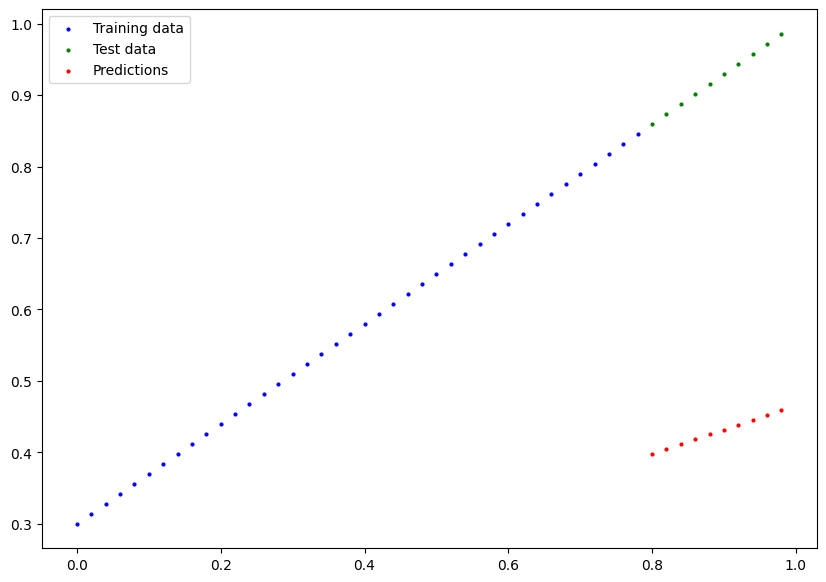

In [86]:
plot_pred(predictions=y_pred)

## Training Model

In [87]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [88]:
from torch import optim

#setup loss function
loss_fn = nn.L1Loss()

#setup an optimizer => using stochastic gradient descent
optimizer = optim.SGD(model0.parameters(),
                            lr=0.01)

### building a training loop (and a testing loop) in pytorch

things in training loop
1. loop through the data
2. forward pass `forward`
3. calculate loss
4. optimizer zero grad
5. loss backward - **backpropogation**
6. optimizer step - **gradient descent**

In [89]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [90]:
torch.manual_seed(42)

# an epoch is one loop through the data
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


#loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model0.train() #train model in pytorch sets all parameters that require gradients to require gradients

  #forward pass
  y_pred = model0(X_train)

  #calc loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  #optimizer zero grad
  optimizer.zero_grad()

  #backprop
  loss.backward()

  #grad desc
  optimizer.step()

  model0.eval() ## turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode():
    ## torch.inference.mode() turns off the gradient tracking, as you dont need gradients while inferencing

    #forward pass
    test_pred = model0(X_test)

    #calc loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss : {loss} | Test Loss: {test_loss}")
    print(model0.state_dict())

Epoch: 0 | Loss : 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss : 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss : 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss : 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss : 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss : 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss : 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Los

In [91]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [92]:
with torch.inference_mode():
  y_test = model0(X_test)

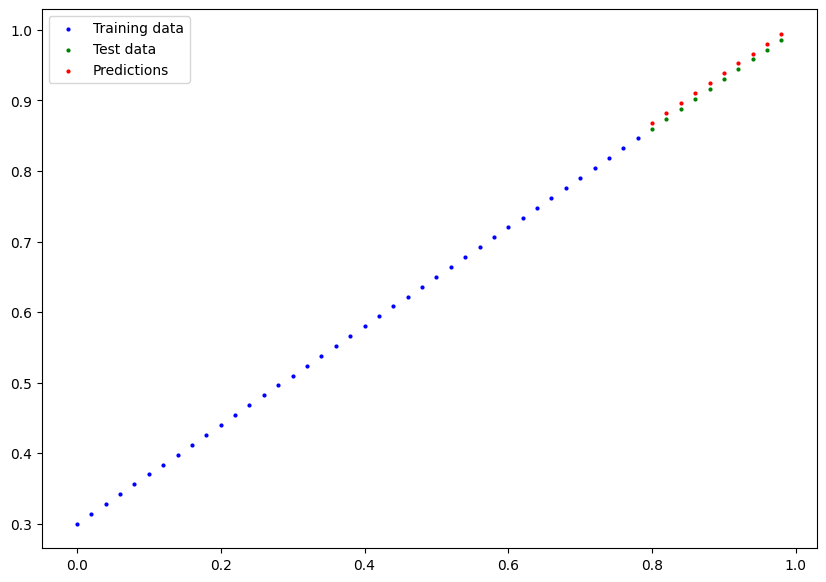

In [93]:
plot_pred(predictions=y_test)

In [94]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [95]:
import numpy as np
torch.tensor(loss_values).type(torch.float64).numpy()

## for plotting you have to change it to numpy array

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248])

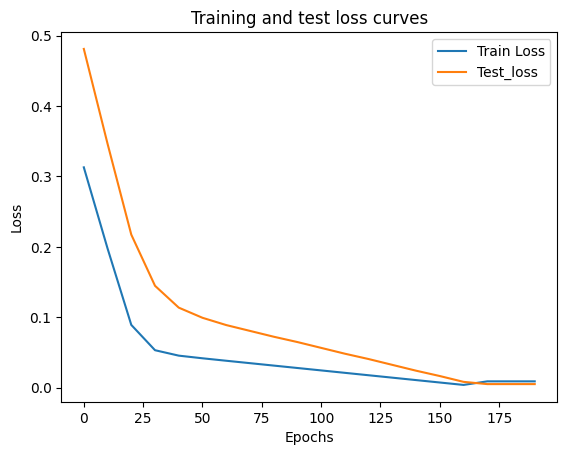

In [96]:
#plot loss curves
plt.plot(epoch_count, torch.tensor(loss_values).type(torch.float64).numpy(), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).type(torch.float64).numpy(), label="Test_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [97]:
## better practise is to do it this way
loss_values_np = [loss.item() for loss in loss_values]
test_loss_np = [loss.item() for loss in test_loss_values]

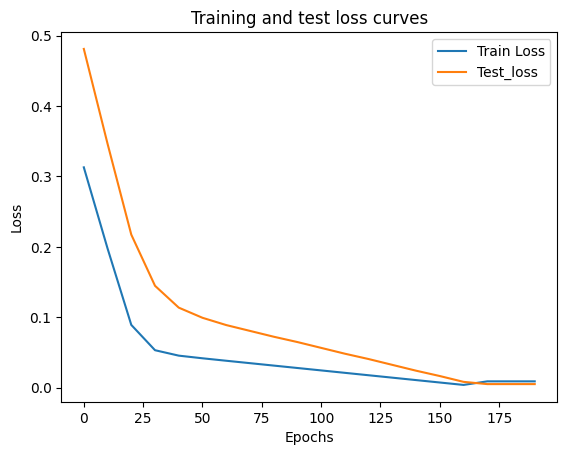

In [98]:
#plot loss curves
plt.plot(epoch_count, loss_values_np, label="Train Loss")
plt.plot(epoch_count, test_loss_np, label="Test_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving model in pytorch

1. `torch.save()` - save model as python pickle file
2. `toch.load()` - load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - load a models's saved state dictionay

In [99]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:
## saving our pytorch model
from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "02_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/02_pytorch_workflow.pth


## Loading saved model

In [101]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [102]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [103]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [104]:
y_pred = model0(X_test)
y_pred.shape

torch.Size([10, 1])

In [105]:
loaded_model_pred = loaded_model(X_test)
loaded_model_pred.shape

torch.Size([10, 1])

In [106]:
y_pred == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [107]:
class linearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #using nn.linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  # forward() function should be written as to overide it as we are creating a sub class of nn.Module
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model1 = linearRegressionModelV2()
model1, model1.state_dict()

(linearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [108]:
#set the model to use target device
next(model1.parameters()).device

device(type='cpu')

In [109]:
model1.to('cuda')
next(model1.parameters()).device

device(type='cuda', index=0)

## training

* loss fn
* optimizer
* training loop
* testing loop

In [110]:
lossfn = nn.L1Loss() #mae
optimizer = optim.SGD(lr=0.01, params=model1.parameters())

In [111]:
torch.manual_seed(42)

epochs = 200

#our data is in cpu and we are trying to run on cuda gpu, we shall move it
X_train = X_train.to('cuda')
y_train = y_train.to('cuda')
X_test = X_test.to('cuda')
y_test = y_test.to('cuda')


for epoch in range(epochs):
  model1.train()

  y_pred_train = model1(X_train)

  loss = lossfn(y_pred_train, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model1.eval()

  with torch.inference_mode():
    y_test_pred = model1(X_test)
    test_loss = lossfn(y_test_pred, y_test)

  if epoch%10 == 0:
    print(f"Epoch:{epoch} | Loss={loss} | test_loss={test_loss}")


Epoch:0 | Loss=0.5551779866218567 | test_loss=0.5655283331871033
Epoch:10 | Loss=0.439968079328537 | test_loss=0.43081846833229065
Epoch:20 | Loss=0.3247582018375397 | test_loss=0.2961086928844452
Epoch:30 | Loss=0.20954833924770355 | test_loss=0.16139881312847137
Epoch:40 | Loss=0.09433845430612564 | test_loss=0.026689011603593826
Epoch:50 | Loss=0.023886388167738914 | test_loss=0.05629696324467659
Epoch:60 | Loss=0.019956795498728752 | test_loss=0.054251011461019516
Epoch:70 | Loss=0.016517987474799156 | test_loss=0.04597845673561096
Epoch:80 | Loss=0.013089174404740334 | test_loss=0.0383928008377552
Epoch:90 | Loss=0.009653178043663502 | test_loss=0.03012026660144329
Epoch:100 | Loss=0.006215683650225401 | test_loss=0.022534603253006935
Epoch:110 | Loss=0.00278724217787385 | test_loss=0.014262056909501553
Epoch:120 | Loss=0.0012645035749301314 | test_loss=0.022249693050980568
Epoch:130 | Loss=0.0012645035749301314 | test_loss=0.022249693050980568
Epoch:140 | Loss=0.00126450357493013

In [112]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

## Making and evaluating predictions

In [113]:
model1.eval()

with torch.inference_mode():
  y_preds = model1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

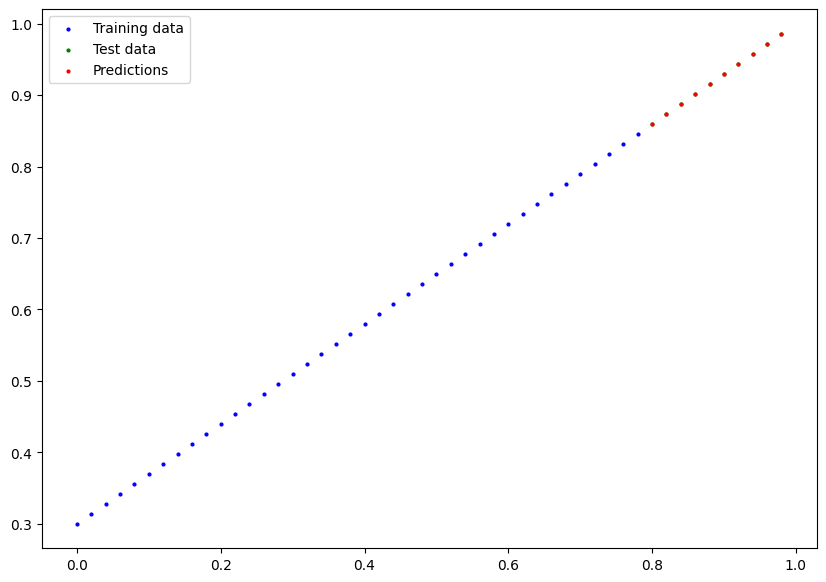

In [114]:
plot_pred(predictions=y_preds.cpu())

## saving and loading training model

In [115]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [117]:
PATH = '/content/models/nnlinearmode.pth'
torch.save(model1.state_dict(), PATH)
print("model1 saved")

model1 saved


In [118]:
loading_model1 = linearRegressionModelV2()
loading_model1.load_state_dict(torch.load(PATH))
print("model loaded")

model loaded


In [119]:
loading_model1.eval()

linearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [120]:
loading_model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])